In [1]:
import findspark
findspark.init('spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('infosys722').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/10/08 09:55:50 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
df = spark.read.load('part_A.csv', format='csv',header='true')

In [3]:
for field in df.schema.fields:
    print(field.name +" , "+str(field.dataType))

ID , StringType
Country , StringType
UNICEF Region , StringType
Year , StringType
Sex , StringType
Age , StringType
Estimated incidence rate of new HIV infection per 1000  , StringType
Estimated number of annual AIDS related deaths , StringType
Estimated number of annual new HIV infections , StringType


In [4]:
for col in df.dtypes:
    print(col[0]+" , "+col[1])

ID , string
Country , string
UNICEF Region , string
Year , string
Sex , string
Age , string
Estimated incidence rate of new HIV infection per 1000  , string
Estimated number of annual AIDS related deaths , string
Estimated number of annual new HIV infections , string


In [5]:
df.show()

+---+-------+--------------------+----+------+---------+-------------------------------------------------------+----------------------------------------------+---------------------------------------------+
| ID|Country|       UNICEF Region|Year|   Sex|      Age|Estimated incidence rate of new HIV infection per 1000 |Estimated number of annual AIDS related deaths|Estimated number of annual new HIV infections|
+---+-------+--------------------+----+------+---------+-------------------------------------------------------+----------------------------------------------+---------------------------------------------+
|  1| Angola|Eastern and South...|1990|Female|Age 10-19|                                                   0.64|                                           100|                                          500|
|  2| Angola|Eastern and South...|1990|  Male|Age 10-19|                                                   0.15|                                           100|                 

In [6]:
df.columns

['ID',
 'Country',
 'UNICEF Region',
 'Year',
 'Sex',
 'Age',
 'Estimated incidence rate of new HIV infection per 1000 ',
 'Estimated number of annual AIDS related deaths',
 'Estimated number of annual new HIV infections']

In [7]:
  # extracting number of rows from the Dataframe
  row = df.count()
   
  # extracting number of columns from the Dataframe
  col = len(df.columns)
 
  # printing
  print(f'Dimension of the Dataframe is: {(row,col)}')
  print(f'Number of Rows are: {row}')
  print(f'Number of Columns are: {col}')

Dimension of the Dataframe is: (5280, 9)
Number of Rows are: 5280
Number of Columns are: 9


In [8]:
# Import the pandas library.
import pandas
# Import matplotlib
import matplotlib.pyplot as plt
#import numpy
import numpy as np

Country
Angola                              120
Benin                               120
Burkina Faso                        120
Burundi                             120
C?te d'Ivoire                       120
Cameroon                            120
Central African Republic            120
Chad                                120
Congo                               120
Democratic Republic of the Congo    120
Djibouti                            120
Equatorial Guinea                   120
Eritrea                             120
Eswatini                            120
Ethiopia                            120
Gabon                               120
Gambia                              120
Ghana                               120
Guinea                              120
Guinea-Bissau                       120
Kenya                               120
Lesotho                             120
Liberia                             120
Madagascar                          120
Malawi                          

<BarContainer object of 5280 artists>

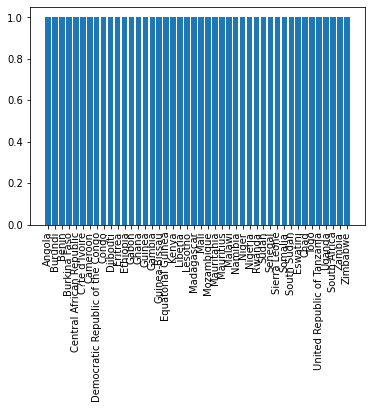

In [9]:
# convert pysaprk df to pandas df for data plotting

table=df.toPandas()


# Country field exploration
country_count=table.pivot_table(columns=['Country'],aggfunc='size')
table['Country'].nunique()
print(country_count)
plt.xticks(rotation='vertical')
plt.bar(table['Country'],1)

UNICEF Region
Eastern and Southern Africa    2640
West and Central Africa        2640
dtype: int64


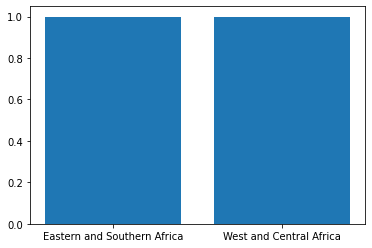

In [10]:
# Region field exploration 
plt.bar(table['UNICEF Region'],np.random.rand(len(table)))
print(table.pivot_table(columns=['UNICEF Region'],aggfunc='size'))

Year
1990    176
1991    176
1992    176
1993    176
1994    176
1995    176
1996    176
1997    176
1998    176
1999    176
2000    176
2001    176
2002    176
2003    176
2004    176
2005    176
2006    176
2007    176
2008    176
2009    176
2010    176
2011    176
2012    176
2013    176
2014    176
2015    176
2016    176
2017    176
2018    176
2019    176
dtype: int64


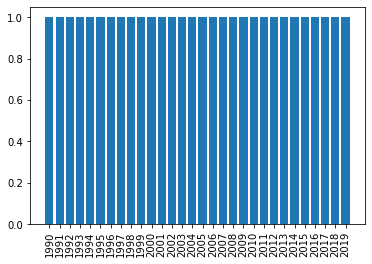

In [11]:
# Year field exploration 
plt.bar(table['Year'],1)
plt.xticks(rotation='vertical')
print(table.pivot_table(columns=['Year'],aggfunc='size'))

<BarContainer object of 5280 artists>

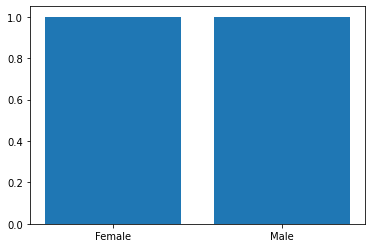

In [12]:
#Sex field exploration
plt.bar(table['Sex'],np.random.rand(len(table)))

In [13]:
from pyspark.sql.functions import col
df = df.withColumn('Estimated incidence rate of new HIV infection per 1000 ',
        col('Estimated incidence rate of new HIV infection per 1000 ').cast('double'))
df.select('Estimated incidence rate of new HIV infection per 1000 ').describe().show()

+-------+-------------------------------------------------------+
|summary|Estimated incidence rate of new HIV infection per 1000 |
+-------+-------------------------------------------------------+
|  count|                                                   5040|
|   mean|                                     3.7513968253968315|
| stddev|                                      7.659773307462848|
|    min|                                                   0.01|
|    max|                                                  70.63|
+-------+-------------------------------------------------------+



In [14]:
# define method to check and visualise data
from pyspark.sql.functions import col
def check_status(field):
    field_table=table[field]
    field_table=pandas.to_numeric(field_table)
    df2 = df.withColumn(field,
        col(field).cast('double'))
    df2.select(field).describe().show()
    print('skewness: ', field_table.skew())
    plt.hist(field_table)
    return

+-------+-------------------------------------------------------+
|summary|Estimated incidence rate of new HIV infection per 1000 |
+-------+-------------------------------------------------------+
|  count|                                                   5040|
|   mean|                                     3.7513968253968315|
| stddev|                                      7.659773307462848|
|    min|                                                   0.01|
|    max|                                                  70.63|
+-------+-------------------------------------------------------+

skewness:  4.365761162183181


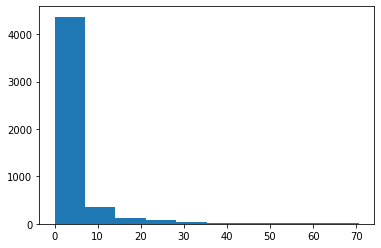

In [15]:
check_status('Estimated incidence rate of new HIV infection per 1000 ')

+-------+----------------------------------------------+
|summary|Estimated number of annual AIDS related deaths|
+-------+----------------------------------------------+
|  count|                                          5160|
|   mean|                             391.9496124031008|
| stddev|                             517.7309304270339|
|    min|                                         100.0|
|    max|                                        3500.0|
+-------+----------------------------------------------+

skewness:  2.4343941287959097


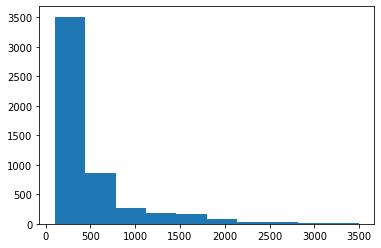

In [16]:
check_status('Estimated number of annual AIDS related deaths')

+-------+---------------------------------------------+
|summary|Estimated number of annual new HIV infections|
+-------+---------------------------------------------+
|  count|                                         5040|
|   mean|                           2777.3055555555557|
| stddev|                            7655.704598615269|
|    min|                                        100.0|
|    max|                                      90000.0|
+-------+---------------------------------------------+

skewness:  7.231498716492041


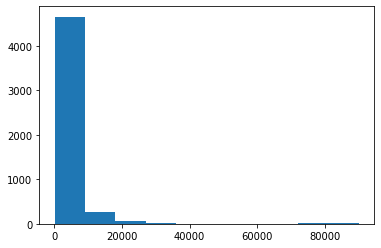

In [17]:
check_status('Estimated number of annual new HIV infections')

In [18]:
#pie chart of male and female estimated incidence rate 
#count incidience rate grouped by sex field

df.groupBy("Sex").count()

DataFrame[Sex: string, count: bigint]

In [20]:
df.groupBy('Sex')

In [ ]:
# Using groupby() and count() count unqiue value in hiv incidence rate grouby sex
df.groupBy("Sex","Estimated incidence rate of new HIV infection per 1000 ").count().groupBy("Sex").count().show()

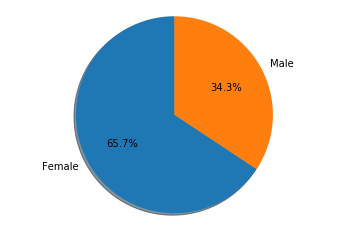

In [93]:
#construct pie chart
labels='Female','Male'
sizes=[722,377]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=(0,0), labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [94]:
#check missing values
from pyspark.sql.functions import col,isnan, when, count
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]
   ).show()

+---+-------+-------------+----+---+---+-------------------------------------------------------+----------------------------------------------+---------------------------------------------+
| ID|Country|UNICEF Region|Year|Sex|Age|Estimated incidence rate of new HIV infection per 1000 |Estimated number of annual AIDS related deaths|Estimated number of annual new HIV infections|
+---+-------+-------------+----+---+---+-------------------------------------------------------+----------------------------------------------+---------------------------------------------+
|  0|      0|            0|   0|  0|  0|                                                    240|                                           120|                                          240|
+---+-------+-------------+----+---+---+-------------------------------------------------------+----------------------------------------------+---------------------------------------------+



In [97]:
df_nums=df.select('Estimated incidence rate of new HIV infection per 1000 ',
 'Estimated number of annual AIDS related deaths',
 'Estimated number of annual new HIV infections')

In [118]:
from pyspark.sql.functions import col
df_nums = df_nums.withColumn('Estimated incidence rate of new HIV infection per 1000 ',
        col('Estimated incidence rate of new HIV infection per 1000 ').cast('double'))

df_nums = df_nums.withColumn('Estimated number of annual AIDS related deaths',
        col('Estimated number of annual AIDS related deaths').cast('double'))

df_nums = df_nums.withColumn('Estimated number of annual new HIV infections',
        col('Estimated number of annual new HIV infections').cast('double'))
    
    

In [121]:
for col in df_nums.dtypes:
    print(col[0]+" , "+col[1])

Estimated incidence rate of new HIV infection per 1000  , double
Estimated number of annual AIDS related deaths , double
Estimated number of annual new HIV infections , double


In [174]:
bounds = {
    c: dict(
        zip(["q1", "q3"], df.approxQuantile(c, [0.1, 0.9], 0))
    )
    for c in df_nums.columns
}

In [175]:
for c in bounds:
    iqr = bounds[c]['q3'] - bounds[c]['q1']
    bounds[c]['lower'] = bounds[c]['q1'] - (iqr * 1.5)
    bounds[c]['upper'] = bounds[c]['q3'] + (iqr * 1.5)
print(bounds)

{'Estimated incidence rate of new HIV infection per 1000 ': {'q1': 0.08, 'q3': 8.96, 'lower': -13.24, 'upper': 22.28}, 'Estimated number of annual AIDS related deaths': {'q1': 100.0, 'q3': 1200.0, 'lower': -1550.0, 'upper': 2850.0}, 'Estimated number of annual new HIV infections': {'q1': 100.0, 'q3': 7700.0, 'lower': -11300.0, 'upper': 19100.0}}


In [176]:
import pyspark.sql.functions as f
df_nums2=df_nums.select(
    "*",
    *[
        f.when(
            f.col(c).between(bounds[c]['lower'], bounds[c]['upper']),
            0
        ).otherwise(1).alias(c+"_outliers") 
        for c in df_nums.columns
    ]
)

In [177]:
df_nums2.columns

['Estimated incidence rate of new HIV infection per 1000 ',
 'Estimated number of annual AIDS related deaths',
 'Estimated number of annual new HIV infections',
 'Estimated incidence rate of new HIV infection per 1000 _outliers',
 'Estimated number of annual AIDS related deaths_outliers',
 'Estimated number of annual new HIV infections_outliers']

In [178]:
df_nums2.groupBy().sum().collect()

[Row(sum(Estimated incidence rate of new HIV infection per 1000 )=18907.04000000003, sum(Estimated number of annual AIDS related deaths)=2022460.0, sum(Estimated number of annual new HIV infections)=13997620.0, sum(Estimated incidence rate of new HIV infection per 1000 _outliers)=414, sum(Estimated number of annual AIDS related deaths_outliers)=146, sum(Estimated number of annual new HIV infections_outliers)=350)]

In [179]:
df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- UNICEF Region: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Estimated incidence rate of new HIV infection per 1000 : double (nullable = true)
 |-- Estimated number of annual AIDS related deaths: double (nullable = true)
 |-- Estimated number of annual new HIV infections: double (nullable = true)



In [182]:
df=df.drop('ID','Age')

In [184]:
df.columns

['Country',
 'UNICEF Region',
 'Year',
 'Sex',
 'Estimated incidence rate of new HIV infection per 1000 ',
 'Estimated number of annual AIDS related deaths',
 'Estimated number of annual new HIV infections']

In [185]:
from pyspark.sql.functions import col
df = df.withColumn('Estimated incidence rate of new HIV infection per 1000 ',
        col('Estimated incidence rate of new HIV infection per 1000 ').cast('double'))

df = df.withColumn('Estimated number of annual AIDS related deaths',
        col('Estimated number of annual AIDS related deaths').cast('double'))

df = df.withColumn('Estimated number of annual new HIV infections',
        col('Estimated number of annual new HIV infections').cast('double'))

df = df.withColumn('Year',
        col('Year').cast('int'))

In [186]:
df.printSchema()

root
 |-- Country: string (nullable = true)
 |-- UNICEF Region: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Estimated incidence rate of new HIV infection per 1000 : double (nullable = true)
 |-- Estimated number of annual AIDS related deaths: double (nullable = true)
 |-- Estimated number of annual new HIV infections: double (nullable = true)



In [187]:
exclude = ['Country',
 'UNICEF Region',
 'Year',
 'Sex',]

In [503]:
from pyspark.sql import functions as F, Window
df_fill_miss = df.select(
    *(
        F.coalesce(F.col(col), F.mean(col).over(Window.orderBy(F.lit(1)))).alias(col)
        if col.lower() not in exclude
        else F.col(col)
        for col in df.columns
    )
)

In [196]:
df_fill_miss.describe().show()

+-------+--------+--------------------+-----------------+------+-------------------------------------------------------+----------------------------------------------+---------------------------------------------+
|summary| Country|       UNICEF Region|             Year|   Sex|Estimated incidence rate of new HIV infection per 1000 |Estimated number of annual AIDS related deaths|Estimated number of annual new HIV infections|
+-------+--------+--------------------+-----------------+------+-------------------------------------------------------+----------------------------------------------+---------------------------------------------+
|  count|    5280|                5280|             5280|  5280|                                                   5280|                                          5280|                                         5280|
|   mean|    null|                null|           2004.5|  null|                                     3.7513968253968457|                        

In [367]:
from pyspark.sql.functions import mean as _mean, stddev as _stddev, col



def get_mean_std(field):
    df_stats = df_fill_miss.select(
        _mean(col(field)).alias('mean'),
        _stddev(col(field)).alias('std')
    ).collect()

    mean = df_stats[0]['mean']
    std = df_stats[0]['std']
    print(mean,std)
    return mean, std
    

In [235]:
get_mean_std('Year')

2004.5 8.656261208920826


In [366]:
from pyspark.sql import functions as F, Window
def replace_outliers(field):
    mean, std=get_mean_std(field)
    upper = mean + 2*std 
    lower = mean - 2*std

    df2 = df_fill_miss.withColumn(
        field, 
        F.when(
            (df_fill_miss[field] > upper) | (df_fill_miss[field] < lower), 
            F.round(F.mean(field).over(Window.orderBy(F.lit(1)))).cast('double')
            # or you can use 
            # F.round(F.lit(df_fill_miss.select(F.mean(F.col('a')).alias('mean')).collect()[0]['mean'])).cast('double')
        ).otherwise(F.col(field))
    )
    df2.select(field).describe().show()
    return df2

In [292]:
df_fill_miss=replace_outliers('Estimated incidence rate of new HIV infection per 1000 ')
df_fill_miss=replace_outliers('Estimated number of annual AIDS related deaths')
df_fill_miss=replace_outliers('Estimated number of annual new HIV infections')

3.7513968253968457 7.483629270571709
+-------+-------------------------------------------------------+
|summary|Estimated incidence rate of new HIV infection per 1000 |
+-------+-------------------------------------------------------+
|  count|                                                   5280|
|   mean|                                      2.523154401154415|
| stddev|                                     3.2338179364408868|
|    min|                                                   0.01|
|    max|                                                  18.65|
+-------+-------------------------------------------------------+

391.9496124031004 511.81268381964145
+-------+----------------------------------------------+
|summary|Estimated number of annual AIDS related deaths|
+-------+----------------------------------------------+
|  count|                                          5280|
|   mean|                             295.3890063424943|
| stddev|                            298.18788

In [293]:
df_fill_miss.describe().show()

+-------+--------+--------------------+-----------------+------+-------------------------------------------------------+----------------------------------------------+---------------------------------------------+
|summary| Country|       UNICEF Region|             Year|   Sex|Estimated incidence rate of new HIV infection per 1000 |Estimated number of annual AIDS related deaths|Estimated number of annual new HIV infections|
+-------+--------+--------------------+-----------------+------+-------------------------------------------------------+----------------------------------------------+---------------------------------------------+
|  count|    5280|                5280|             5280|  5280|                                                   5280|                                          5280|                                         5280|
|   mean|    null|                null|           2004.5|  null|                                      2.523154401154415|                        

4844
436


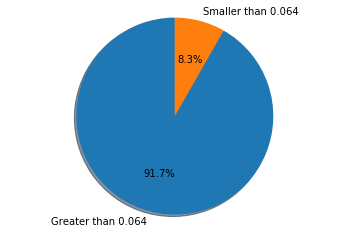

In [295]:
#data construction
incidence_greater_than_OCEDRate=table.loc[table['Estimated incidence rate of new HIV infection per 1000 ']>=0.064]
incidence_samller_than_OCEDRate=table.loc[table['Estimated incidence rate of new HIV infection per 1000 ']<0.064]
greater_rate=incidence_greater_than_OCEDRate['Estimated incidence rate of new HIV infection per 1000 '].count()
smaller_rate=incidence_samller_than_OCEDRate['Estimated incidence rate of new HIV infection per 1000 '].count()
print(greater_rate)
print(smaller_rate)
labels1='Greater than 0.064','Smaller than 0.064'
sizes1=[greater_rate,smaller_rate]
fig2, ax2 = plt.subplots()
ax2.pie(sizes1, explode=(0,0), labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [296]:
df_fill_miss.describe().show()

+-------+--------+--------------------+-----------------+------+-------------------------------------------------------+----------------------------------------------+---------------------------------------------+
|summary| Country|       UNICEF Region|             Year|   Sex|Estimated incidence rate of new HIV infection per 1000 |Estimated number of annual AIDS related deaths|Estimated number of annual new HIV infections|
+-------+--------+--------------------+-----------------+------+-------------------------------------------------------+----------------------------------------------+---------------------------------------------+
|  count|    5280|                5280|             5280|  5280|                                                   5280|                                          5280|                                         5280|
|   mean|    null|                null|           2004.5|  null|                                      2.523154401154415|                        

In [297]:
df_new = spark.read.load('part_B.csv', format='csv',header='true')

In [298]:
df_new.columns

['Country',
 'UNICEF Region',
 'Year',
 'Sex',
 'Age',
 'Estimated number of people living with HIV',
 'Estimated rate of annual AIDS related deaths per 100000']

In [299]:
for col in df_new.dtypes:
    print(col[0]+" , "+col[1])

Country , string
UNICEF Region , string
Year , string
Sex , string
Age , string
Estimated number of people living with HIV , string
Estimated rate of annual AIDS related deaths per 100000 , string


In [317]:
#join two data frame
df_join = df_fill_miss.join(df_new, ['Country',
 'UNICEF Region',
 'Year',
 'Sex'])

In [318]:
final_df=df_join.drop('Age')

In [319]:
final_df.columns

['Country',
 'UNICEF Region',
 'Year',
 'Sex',
 'Estimated incidence rate of new HIV infection per 1000 ',
 'Estimated number of annual AIDS related deaths',
 'Estimated number of annual new HIV infections',
 'Estimated number of people living with HIV',
 'Estimated rate of annual AIDS related deaths per 100000']

In [320]:
final_df.printSchema()

root
 |-- Country: string (nullable = true)
 |-- UNICEF Region: string (nullable = true)
 |-- Year: double (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Estimated incidence rate of new HIV infection per 1000 : double (nullable = true)
 |-- Estimated number of annual AIDS related deaths: double (nullable = true)
 |-- Estimated number of annual new HIV infections: double (nullable = true)
 |-- Estimated number of people living with HIV: string (nullable = true)
 |-- Estimated rate of annual AIDS related deaths per 100000: string (nullable = true)



In [321]:
from pyspark.sql.functions import col
final_df = final_df.withColumn('Estimated number of people living with HIV',
        col('Estimated number of people living with HIV').cast('double'))

final_df = final_df.withColumn('Estimated rate of annual AIDS related deaths per 100000',
        col('Estimated rate of annual AIDS related deaths per 100000').cast('double'))

In [356]:
final_df.printSchema()

root
 |-- Country: string (nullable = true)
 |-- UNICEF Region: string (nullable = true)
 |-- Year: double (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Estimated incidence rate of new HIV infection per 1000 : double (nullable = true)
 |-- Estimated number of annual AIDS related deaths: double (nullable = true)
 |-- Estimated number of annual new HIV infections: double (nullable = true)
 |-- Estimated number of people living with HIV: double (nullable = true)
 |-- Estimated rate of annual AIDS related deaths per 100000: double (nullable = true)



In [357]:
import pyspark.ml.feature as MF

In [504]:
imputer = MF.Imputer(strategy='median', inputCols=['Estimated number of people living with HIV', 'Estimated rate of annual AIDS related deaths per 100000'], outputCols=['Estimated number of people living with HIV', 'Estimated rate of annual AIDS related deaths per 100000'])
model = imputer.fit(final_df)
final_df=model.transform(final_df)

In [362]:
final_df.describe().show()

+-------+--------+--------------------+-----------------+------+-------------------------------------------------------+----------------------------------------------+---------------------------------------------+------------------------------------------+-------------------------------------------------------+
|summary| Country|       UNICEF Region|             Year|   Sex|Estimated incidence rate of new HIV infection per 1000 |Estimated number of annual AIDS related deaths|Estimated number of annual new HIV infections|Estimated number of people living with HIV|Estimated rate of annual AIDS related deaths per 100000|
+-------+--------+--------------------+-----------------+------+-------------------------------------------------------+----------------------------------------------+---------------------------------------------+------------------------------------------+-------------------------------------------------------+
|  count|    5280|                5280|             5280|  52

In [363]:
final_df.columns

['Country',
 'UNICEF Region',
 'Year',
 'Sex',
 'Estimated incidence rate of new HIV infection per 1000 ',
 'Estimated number of annual AIDS related deaths',
 'Estimated number of annual new HIV infections',
 'Estimated number of people living with HIV',
 'Estimated rate of annual AIDS related deaths per 100000']

In [365]:
final_df.select('Estimated number of people living with HIV').describe().show()
final_df.select('Estimated rate of annual AIDS related deaths per 100000').describe().show()

+-------+------------------------------------------+
|summary|Estimated number of people living with HIV|
+-------+------------------------------------------+
|  count|                                      5280|
|   mean|                        13028.427434634332|
| stddev|                        27006.566427171118|
|    min|                                     100.0|
|    max|                                  250000.0|
+-------+------------------------------------------+

+-------+-------------------------------------------------------+
|summary|Estimated rate of annual AIDS related deaths per 100000|
+-------+-------------------------------------------------------+
|  count|                                                   5280|
|   mean|                                     16.708713178294555|
| stddev|                                     21.245453105049403|
|    min|                                                   0.01|
|    max|                                                 13

In [373]:
from pyspark.sql.functions import mean as _mean, stddev as _stddev, col



def get_mean_std2(field):
    df_stats = final_df.select(
        _mean(col(field)).alias('mean'),
        _stddev(col(field)).alias('std')
    ).collect()

    mean = df_stats[0]['mean']
    std = df_stats[0]['std']
    print(mean,std)
    return mean, std
    

In [508]:
from pyspark.sql import functions as F, Window
def replace_outliers2(field):
    mean, std=get_mean_std2(field)
    upper = mean + 3*std 
    lower = 0

    df2 = final_df.withColumn(
        field, 
        F.when(
            (final_df[field] > upper) | (final_df[field] < lower), 
            F.round(F.mean(field).over(Window.orderBy(F.lit(1)))).cast('double')
        ).otherwise(F.col(field))
    )
    df2.select(field).describe().show()
    return df2

In [377]:
final_df=replace_outliers2('Estimated number of people living with HIV')
final_df=replace_outliers2('Estimated rate of annual AIDS related deaths per 100000')

13028.427434634332 27006.566427171118
+-------+------------------------------------------+
|summary|Estimated number of people living with HIV|
+-------+------------------------------------------+
|  count|                                      5280|
|   mean|                          9807.60016190706|
| stddev|                        14662.579816133431|
|    min|                                     100.0|
|    max|                                   67000.0|
+-------+------------------------------------------+

16.708713178294555 21.245453105049403
+-------+-------------------------------------------------------+
|summary|Estimated rate of annual AIDS related deaths per 100000|
+-------+-------------------------------------------------------+
|  count|                                                   5280|
|   mean|                                      12.85911090556738|
| stddev|                                     12.660770713506615|
|    min|                                         

In [378]:
table=final_df.toPandas()

(array([3534.,  624.,  252.,  158.,  202.,  166.,   98.,   78.,  108.,
          60.]),
 array([  100.,  6790., 13480., 20170., 26860., 33550., 40240., 46930.,
        53620., 60310., 67000.]),
 <a list of 10 Patch objects>)

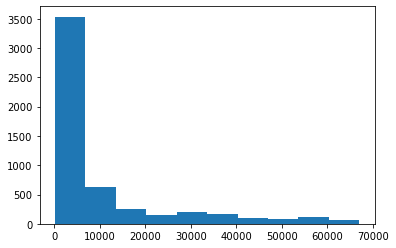

In [381]:
plt.hist(table['Estimated number of people living with HIV'])

(array([2018.,  902., 1050.,  498.,  254.,  176.,  128.,  102.,   90.,
          62.]),
 array([1.000e-02, 5.910e+00, 1.181e+01, 1.771e+01, 2.361e+01, 2.951e+01,
        3.541e+01, 4.131e+01, 4.721e+01, 5.311e+01, 5.901e+01]),
 <a list of 10 Patch objects>)

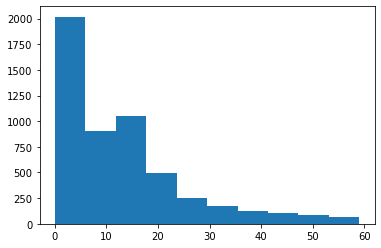

In [382]:
plt.hist(table['Estimated rate of annual AIDS related deaths per 100000'])

In [384]:
final_df.printSchema()
final_df.columns

root
 |-- Country: string (nullable = true)
 |-- UNICEF Region: string (nullable = true)
 |-- Year: double (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Estimated incidence rate of new HIV infection per 1000 : double (nullable = true)
 |-- Estimated number of annual AIDS related deaths: double (nullable = true)
 |-- Estimated number of annual new HIV infections: double (nullable = true)
 |-- Estimated number of people living with HIV: double (nullable = true)
 |-- Estimated rate of annual AIDS related deaths per 100000: double (nullable = true)



['Country',
 'UNICEF Region',
 'Year',
 'Sex',
 'Estimated incidence rate of new HIV infection per 1000 ',
 'Estimated number of annual AIDS related deaths',
 'Estimated number of annual new HIV infections',
 'Estimated number of people living with HIV',
 'Estimated rate of annual AIDS related deaths per 100000']

In [388]:
data = final_df.select(col('Country'),
                       col("UNICEF Region").alias("Region"), 
                       col('Year'),
                       col('Sex'),
                           col("Estimated incidence rate of new HIV infection per 1000 ").alias("Estimated new HIV incidence rate per 1000"),
                          col("Estimated number of annual AIDS related deaths").alias("Estimated annual AIDS related death number"),
                          col("Estimated number of annual new HIV infections").alias("Estimated annual new HIV number"),
                          col("Estimated rate of annual AIDS related deaths per 100000").alias("Estimated annual AID related deaths rate per 100000"),
                       col('Estimated number of people living with HIV')
                      )

In [389]:
data.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Year: double (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Estimated new HIV incidence rate per 1000: double (nullable = true)
 |-- Estimated annual AIDS related death number: double (nullable = true)
 |-- Estimated annual new HIV number: double (nullable = true)
 |-- Estimated annual AID related deaths rate per 100000: double (nullable = true)
 |-- Estimated number of people living with HIV: double (nullable = true)



In [390]:
data=data.sort("Year")

In [391]:
data.show(20)

+--------------------+--------------------+------+------+-----------------------------------------+------------------------------------------+-------------------------------+---------------------------------------------------+------------------------------------------+
|             Country|              Region|  Year|   Sex|Estimated new HIV incidence rate per 1000|Estimated annual AIDS related death number|Estimated annual new HIV number|Estimated annual AID related deaths rate per 100000|Estimated number of people living with HIV|
+--------------------+--------------------+------+------+-----------------------------------------+------------------------------------------+-------------------------------+---------------------------------------------------+------------------------------------------+
|       C?te d'Ivoire|West and Central ...|1990.0|Female|                                     7.81|                                     100.0|                         4400.0|                

In [392]:
data.distinct().count()

2640

In [393]:
data=data.distinct()


In [395]:
from pyspark.ml.feature import StringIndexer
data.columns

['Country',
 'Region',
 'Year',
 'Sex',
 'Estimated new HIV incidence rate per 1000',
 'Estimated annual AIDS related death number',
 'Estimated annual new HIV number',
 'Estimated annual AID related deaths rate per 100000',
 'Estimated number of people living with HIV']

In [397]:
indexer = StringIndexer(inputCol='Country', outputCol='Country_code')
indexer_fitted = indexer.fit(data)
df_indexed = indexer_fitted.transform(data)

indexer2 = StringIndexer(inputCol='Region', outputCol='Region_code')
indexer_fitted2 = indexer2.fit(df_indexed)
df_indexed2 = indexer_fitted2.transform(df_indexed)

indexer3 = StringIndexer(inputCol='Sex', outputCol='Sex_code')
indexer_fitted3 = indexer3.fit(df_indexed2)
df_indexed3 = indexer_fitted3.transform(df_indexed2)

In [399]:
df_indexed3.columns

['Country',
 'Region',
 'Year',
 'Sex',
 'Estimated new HIV incidence rate per 1000',
 'Estimated annual AIDS related death number',
 'Estimated annual new HIV number',
 'Estimated annual AID related deaths rate per 100000',
 'Estimated number of people living with HIV',
 'Country_code',
 'Region_code',
 'Sex_code']

In [402]:
data_indexed = df_indexed3.drop('Country','Region','Sex')

In [404]:
data_indexed.printSchema()

root
 |-- Year: double (nullable = true)
 |-- Estimated new HIV incidence rate per 1000: double (nullable = true)
 |-- Estimated annual AIDS related death number: double (nullable = true)
 |-- Estimated annual new HIV number: double (nullable = true)
 |-- Estimated annual AID related deaths rate per 100000: double (nullable = true)
 |-- Estimated number of people living with HIV: double (nullable = true)
 |-- Country_code: double (nullable = false)
 |-- Region_code: double (nullable = false)
 |-- Sex_code: double (nullable = false)



In [405]:
feature_table = data_indexed.toPandas()

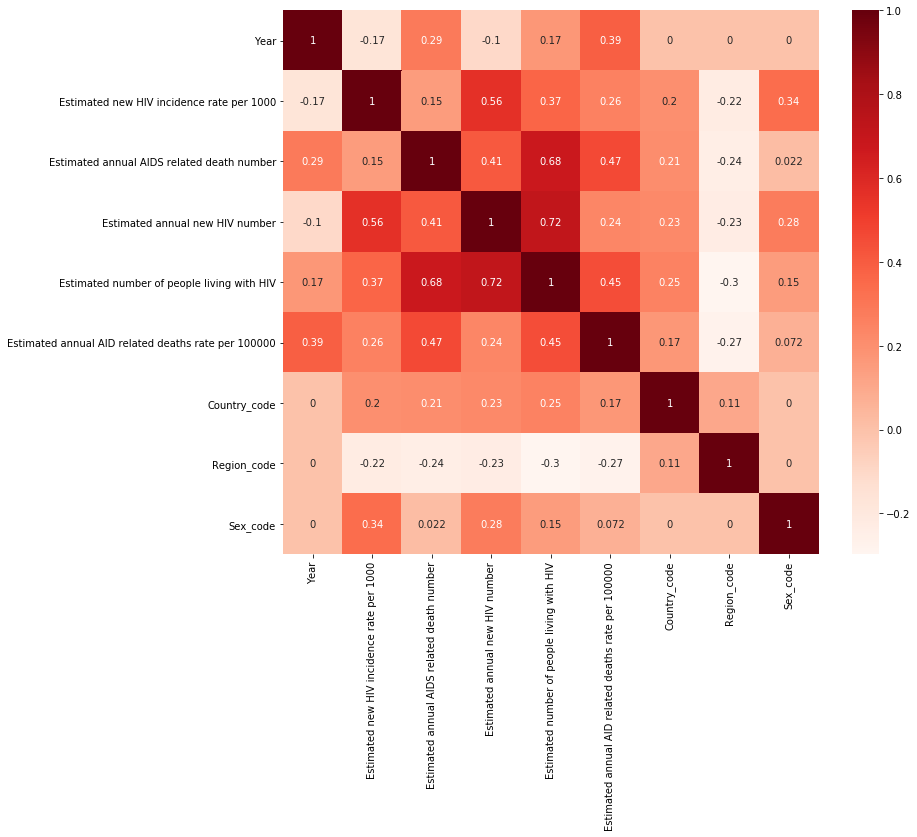

Year                                                   0.165562
Estimated new HIV incidence rate per 1000              1.000000
Estimated annual AIDS related death number             0.151876
Estimated annual new HIV number                        0.563753
Estimated number of people living with HIV             0.371710
Estimated annual AID related deaths rate per 100000    0.259627
Country_code                                           0.201783
Region_code                                            0.221008
Sex_code                                               0.337371
Name: Estimated new HIV incidence rate per 1000, dtype: float64

In [407]:
import seaborn as sns
num = feature_table[['Year', 'Estimated new HIV incidence rate per 1000',
       'Estimated annual AIDS related death number',
       'Estimated annual new HIV number',
       'Estimated number of people living with HIV',
       'Estimated annual AID related deaths rate per 100000', 'Country_code',
       'Region_code', 'Sex_code']]
plt.figure(figsize=(12,10))
cor = num.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
#Correlation with output variable
cor_target = abs(cor["Estimated new HIV incidence rate per 1000"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

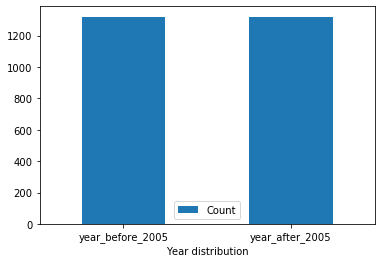

In [408]:
#data projection, distribute year into two groups
year_before_2005= feature_table[feature_table['Year']<2005]
year_after_2005 = feature_table[feature_table['Year']>=2005]
year_distribution = pandas.DataFrame({'Year distribution':['year_before_2005','year_after_2005'],'Count':[year_before_2005.shape[0],year_after_2005.shape[0]]})
ax = year_distribution.plot.bar(x='Year distribution', y='Count', rot=0)

In [409]:
df_indexed3.columns

['Country',
 'Region',
 'Year',
 'Sex',
 'Estimated new HIV incidence rate per 1000',
 'Estimated annual AIDS related death number',
 'Estimated annual new HIV number',
 'Estimated annual AID related deaths rate per 100000',
 'Estimated number of people living with HIV',
 'Country_code',
 'Region_code',
 'Sex_code']

In [411]:
female_df=df_indexed3.filter(df_indexed3.Sex == 'Female')
male_df=df_indexed3.filter(df_indexed3.Sex == 'Male')

In [415]:
female_df.count()

1320

In [416]:
male_df.count()

1320

In [417]:
female_df.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Year: double (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Estimated new HIV incidence rate per 1000: double (nullable = true)
 |-- Estimated annual AIDS related death number: double (nullable = true)
 |-- Estimated annual new HIV number: double (nullable = true)
 |-- Estimated annual AID related deaths rate per 100000: double (nullable = true)
 |-- Estimated number of people living with HIV: double (nullable = true)
 |-- Country_code: double (nullable = false)
 |-- Region_code: double (nullable = false)
 |-- Sex_code: double (nullable = false)



In [418]:
male_df.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Year: double (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Estimated new HIV incidence rate per 1000: double (nullable = true)
 |-- Estimated annual AIDS related death number: double (nullable = true)
 |-- Estimated annual new HIV number: double (nullable = true)
 |-- Estimated annual AID related deaths rate per 100000: double (nullable = true)
 |-- Estimated number of people living with HIV: double (nullable = true)
 |-- Country_code: double (nullable = false)
 |-- Region_code: double (nullable = false)
 |-- Sex_code: double (nullable = false)



In [421]:
female_df.select('Country','Country_code').distinct().collect()

[Row(Country='Angola', Country_code=5.0),
 Row(Country='Burundi', Country_code=29.0),
 Row(Country='Benin', Country_code=12.0),
 Row(Country='Burkina Faso', Country_code=40.0),
 Row(Country='Central African Republic', Country_code=41.0),
 Row(Country="C?te d'Ivoire", Country_code=25.0),
 Row(Country='Cameroon', Country_code=27.0),
 Row(Country='Democratic Republic of the Congo', Country_code=14.0),
 Row(Country='Congo', Country_code=22.0),
 Row(Country='Djibouti', Country_code=15.0),
 Row(Country='Eritrea', Country_code=6.0),
 Row(Country='Ethiopia', Country_code=35.0),
 Row(Country='Gabon', Country_code=1.0),
 Row(Country='Ghana', Country_code=23.0),
 Row(Country='Guinea', Country_code=43.0),
 Row(Country='Gambia', Country_code=28.0),
 Row(Country='Guinea-Bissau', Country_code=31.0),
 Row(Country='Equatorial Guinea', Country_code=17.0),
 Row(Country='Kenya', Country_code=21.0),
 Row(Country='Liberia', Country_code=19.0),
 Row(Country='Lesotho', Country_code=42.0),
 Row(Country='Madaga

In [422]:
female_df.select('Region','Region_code').distinct().collect()

[Row(Region='Eastern and Southern Africa', Region_code=0.0),
 Row(Region='West and Central Africa', Region_code=1.0)]

In [426]:
female_df.select('Sex','Sex_code').distinct().collect()

[Row(Sex='Female', Sex_code=1.0)]

In [427]:
male_df.select('Sex','Sex_code').distinct().collect()

[Row(Sex='Male', Sex_code=0.0)]

In [428]:
# Import VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [429]:
# The input columns are the feature column names, and the output column is what you'd like the new column to be named. 
assembler = VectorAssembler(
    inputCols=['Estimated annual AIDS related death number',
 'Estimated annual new HIV number',
 'Estimated annual AID related deaths rate per 100000',
 'Estimated number of people living with HIV',
 'Country_code',
 'Region_code',
 'Sex_code', 'Year'],
    outputCol="features")

In [431]:
female_output=assembler.transform(female_df)

In [432]:
male_output=assembler.transform(male_df)

In [434]:
male_output.head(1)

[Row(Country='Angola', Region='Eastern and Southern Africa', Year=1990.0, Sex='Male', Estimated new HIV incidence rate per 1000=0.15, Estimated annual AIDS related death number=100.0, Estimated annual new HIV number=100.0, Estimated annual AID related deaths rate per 100000=0.07, Estimated number of people living with HIV=200.0, Country_code=5.0, Region_code=0.0, Sex_code=0.0, features=DenseVector([100.0, 100.0, 0.07, 200.0, 5.0, 0.0, 0.0, 1990.0]))]

In [436]:
female_final_data=female_output.select('features','Estimated new HIV incidence rate per 1000')
male_final_data=male_output.select('features','Estimated new HIV incidence rate per 1000')

In [437]:
from pyspark.ml.regression import LinearRegression
m_lr = LinearRegression(labelCol='Estimated new HIV incidence rate per 1000')
f_lr = LinearRegression(labelCol='Estimated new HIV incidence rate per 1000')

In [440]:
# Fit the model to the data.
f_lrModel = f_lr.fit(female_final_data)
m_lrModel = m_lr.fit(male_final_data)

In [441]:
# Print the coefficients and intercept for linear regression.
print(" Female Coefficients: {} Intercept: {}".format(f_lrModel.coefficients,f_lrModel.intercept))
print("Male Coefficients: {} Intercept: {}".format(m_lrModel.coefficients,m_lrModel.intercept))

 Female Coefficients: [-0.001323093620833819,0.0004197585948684455,0.08574363487162524,4.742787053531592e-06,0.035631154490650935,-0.6234748246055235,0.0,-0.07835392956180073] Intercept: 158.25346122224943
Male Coefficients: [-0.0012382304563919614,0.0006114789721220333,0.02625020395589672,-1.4298258565299445e-05,0.019071250371123952,-0.7351931837068924,0.0,-0.040548372829895735] Intercept: 82.16606015756447


In [442]:
from sklearn import linear_model
def build_linear_model(X_train,y_train,X_test,y_test):
    ols = linear_model.LinearRegression()
    model = ols.fit(X_train, y_train)
    print(model.coef_)
    print(model.intercept_)
    
    
    y_pred=model.predict(X_test)
    plt.figure(figsize=(15,10))
    plt.scatter(y_test,y_pred)
    plt.xlabel("Actual")
    plt.ylabel('Predicted')
    plt.title("Actual vs Predicted")
    return y_test,y_pred


In [443]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
from ann_visualizer.visualize import ann_viz;
# split into input (X) and output (Y) variables
def build_neural_network(x,y):
    X = x
    Y = y
    # create model
    # create ANN model
    model = Sequential()
     
    # Defining the Input layer and FIRST hidden layer, both are same!
    model.add(Dense(units=8, input_dim=8, kernel_initializer='normal', activation='relu'))
     
    # Defining the Second layer of the model
    # after the first layer we don't have to specify input_dim as keras configure it automatically
    model.add(Dense(units=8, kernel_initializer='normal', activation='tanh'))
     
    # The output neuron is a single fully connected node 
    # Since we will be predicting a single number
    model.add(Dense(1, kernel_initializer='normal'))
     
    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer='adam')
     
    # Fitting the ANN to the Training set
    model.fit(X, Y ,batch_size = 20, epochs = 50, verbose=1)
    
    ann_viz(model, title="Estimated new HIV incidence rate-female neural network")
    return

In [477]:
#find the best batch size and epoch for neural network
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    

    SearchResultsData=pandas.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'],dtype=object)
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=8, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=8, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = abs(np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test)))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE+35)
            
            SearchResultsData=SearchResultsData.append(pandas.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)

In [446]:
# Split the data into training and testing set
### Sandardization of data ###
def split_standarize_data(table):
    from sklearn.preprocessing import StandardScaler
    TargetVariable=['Estimated new HIV incidence rate per 1000']
    Predictors=['Year', 
           'Estimated annual AIDS related death number',
           'Estimated annual new HIV number',
           'Estimated number of people living with HIV',
           'Estimated annual AID related deaths rate per 100000', 'Country_code',
           'Region_code', 'Sex_code']
     
    X=table[Predictors].values
    y=table[TargetVariable].values
    
    
    PredictorScaler=StandardScaler()
    TargetVarScaler=StandardScaler()
     
    # Storing the fit object for later reference
    PredictorScalerFit=PredictorScaler.fit(X)
    TargetVarScalerFit=TargetVarScaler.fit(y)
     
    # Generating the standardized values of X and y
    X=PredictorScalerFit.transform(X)
    y=TargetVarScalerFit.transform(y)
     
    # Split the data into training and testing set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
     
    # Quick sanity check with the shapes of Training and testing datasets
    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)
    return X_train,X_test,y_train,y_test

In [451]:
female_df=female_df.drop('Country','Region','Sex')
male_df=male_df.drop('Country','Region','Sex')

In [453]:
female_table=female_df.toPandas()
male_table=male_df.toPandas()

In [454]:
F_X_train,F_X_test,F_y_train,F_y_test=split_standarize_data(female_table)
M_X_train,M_X_test,M_y_train,M_y_test=split_standarize_data(male_table)

(1056, 8)
(1056, 1)
(264, 8)
(264, 1)
(1056, 8)
(1056, 1)
(264, 8)
(264, 1)


[[-0.16342776 -0.20374894  0.59014801 -0.09778552  0.17243185  0.11991773
  -0.17433355  0.        ]]
[-0.00393159]


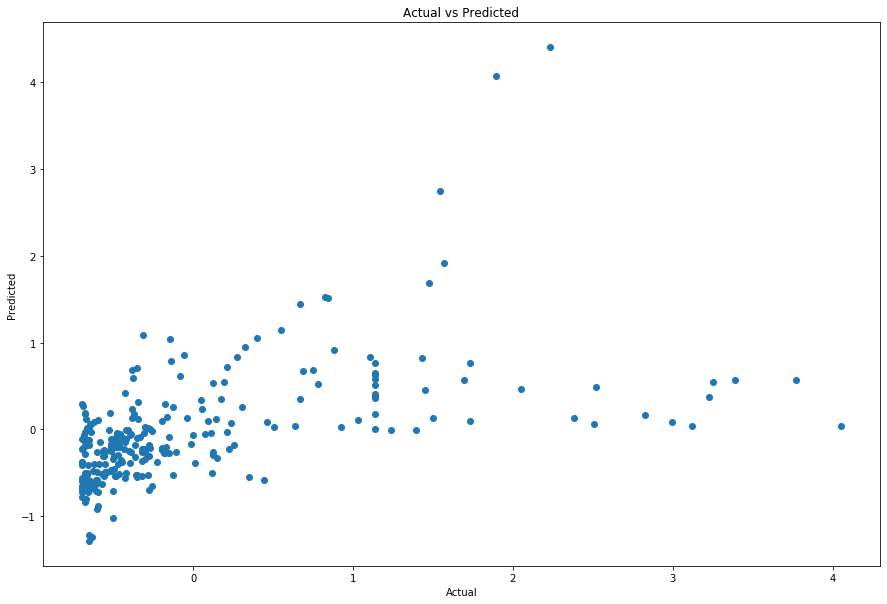

In [491]:
   
M_y_test,M_y_pred=build_linear_model(M_X_train,M_y_train,M_X_test,M_y_test)

[[-0.16281731 -0.12955899  0.3790998   0.05398556  0.28667684  0.13233062
  -0.08419085  0.        ]]
[0.00313063]


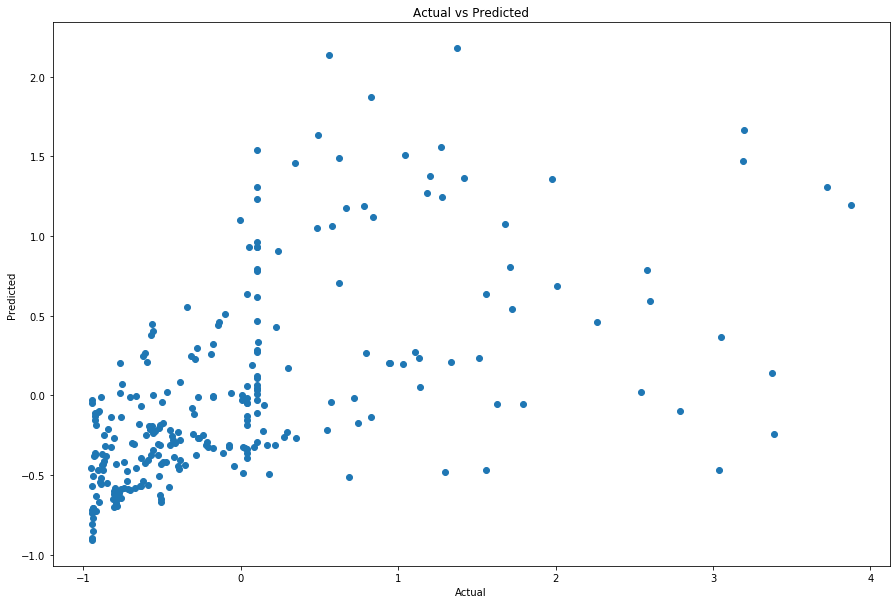

In [492]:
F_y_test,F_y_pred=build_linear_model(F_X_train,F_y_train,F_X_test,F_y_test) 

In [458]:
build_neural_network(M_X_train ,M_y_train)

Epoch 1/50
53/53 [==============================] - 1s 2ms/step - loss: 1.0383
Epoch 2/50
53/53 [==============================] - 0s 2ms/step - loss: 0.9854
Epoch 3/50
53/53 [==============================] - 0s 2ms/step - loss: 0.8299
Epoch 4/50
53/53 [==============================] - 0s 2ms/step - loss: 0.6959
Epoch 5/50
53/53 [==============================] - 0s 2ms/step - loss: 0.6321
Epoch 6/50
53/53 [==============================] - 0s 2ms/step - loss: 0.6007
Epoch 7/50
53/53 [==============================] - 0s 2ms/step - loss: 0.5861
Epoch 8/50
53/53 [==============================] - 0s 2ms/step - loss: 0.5755
Epoch 9/50
53/53 [==============================] - 0s 2ms/step - loss: 0.5693
Epoch 10/50
53/53 [==============================] - 0s 2ms/step - loss: 0.5680
Epoch 11/50
53/53 [==============================] - 0s 2ms/step - loss: 0.5630
Epoch 12/50
53/53 [==============================] - 0s 2ms/step - loss: 0.5608
Epoch 13/50
53/53 [==============================

In [459]:
build_neural_network(F_X_train,F_y_train)

Epoch 1/50
53/53 [==============================] - 0s 2ms/step - loss: 1.0015
Epoch 2/50
53/53 [==============================] - 0s 2ms/step - loss: 0.8867
Epoch 3/50
53/53 [==============================] - 0s 2ms/step - loss: 0.7079
Epoch 4/50
53/53 [==============================] - 0s 2ms/step - loss: 0.6472
Epoch 5/50
53/53 [==============================] - 0s 2ms/step - loss: 0.6185
Epoch 6/50
53/53 [==============================] - 0s 3ms/step - loss: 0.6001
Epoch 7/50
53/53 [==============================] - 0s 3ms/step - loss: 0.5864
Epoch 8/50
53/53 [==============================] - 0s 3ms/step - loss: 0.5758
Epoch 9/50
53/53 [==============================] - 0s 2ms/step - loss: 0.5718
Epoch 10/50
53/53 [==============================] - 0s 2ms/step - loss: 0.5685
Epoch 11/50
53/53 [==============================] - 0s 2ms/step - loss: 0.5625
Epoch 12/50
53/53 [==============================] - 0s 2ms/step - loss: 0.5580
Epoch 13/50
53/53 [==============================

In [466]:
M_ResultsData=FunctionFindBestParams(M_X_train,M_y_train,M_X_test,M_y_test)

9/9 [==============================] - 0s 2ms/step
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: -55.11326190436239
9/9 [==============================] - 0s 2ms/step
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 18.587234190784173
9/9 [==============================] - 0s 2ms/step
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: -48.793930529444054
9/9 [==============================] - 0s 2ms/step
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: -71.83072458288817
9/9 [==============================] - 0s 2ms/step
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 69.25375315396963
9/9 [==============================] - 0s 2ms/step
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: -3.439531398677701
9/9 [==============================] - 0s 2ms/step
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: -88.49972731804988
9/9 [==============================] - 0s 2ms/step
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 20.00149487099334
9/9 [========================

In [478]:
F_ResultsData=FunctionFindBestParams(F_X_train,F_y_train,F_X_test,F_y_test)

9/9 [==============================] - 0s 2ms/step
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 87.78575352913252
9/9 [==============================] - 0s 2ms/step
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 90.03455488200385
9/9 [==============================] - 0s 2ms/step
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 86.57370657071702
9/9 [==============================] - 0s 2ms/step
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 89.95613988105364
9/9 [==============================] - 0s 2ms/step
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 81.69719458482214
9/9 [==============================] - 0s 2ms/step
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 86.21286576726179
9/9 [==============================] - 0s 2ms/step
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 80.25297500325688
9/9 [==============================] - 0s 2ms/step
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 116.72175706913622
9/9 [==============================

In [468]:
def check_neural_plot(X_train, y_train, X_test, y_test,size,number):
    model = Sequential()
    model.add(Dense(units=8, input_dim=8, kernel_initializer='normal', activation='relu'))
     
    # Defining the Second layer of the model
    # after the first layer we don't have to specify input_dim as keras configure it automatically
    model.add(Dense(units=8, kernel_initializer='normal', activation='tanh'))
     
    # The output neuron is a single fully connected node 
    # Since we will be predicting a single number
    model.add(Dense(1, kernel_initializer='normal'))
     
    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train ,batch_size = size, epochs = number, verbose=0)
 
    # Generating Predictions on testing data
    y_pred=model.predict(X_test)
    y_pred=model.predict(X_test)
    plt.figure(figsize=(15,10))
    plt.scatter(y_test,y_pred)
    plt.xlabel("Actual")
    plt.ylabel('Predicted')
    plt.title("Actual vs Predicted")
    return y_test,y_pred

9/9 [==============================] - 0s 2ms/step


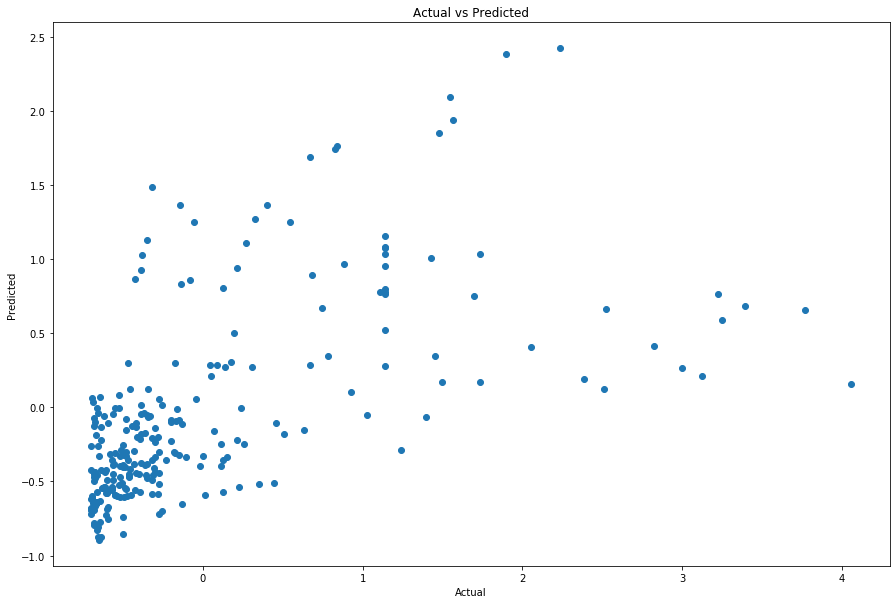

In [472]:
M_y_test,M_y_pred=check_neural_plot(M_X_train,M_y_train,M_X_test,M_y_test, 20, 10)

9/9 [==============================] - 0s 2ms/step


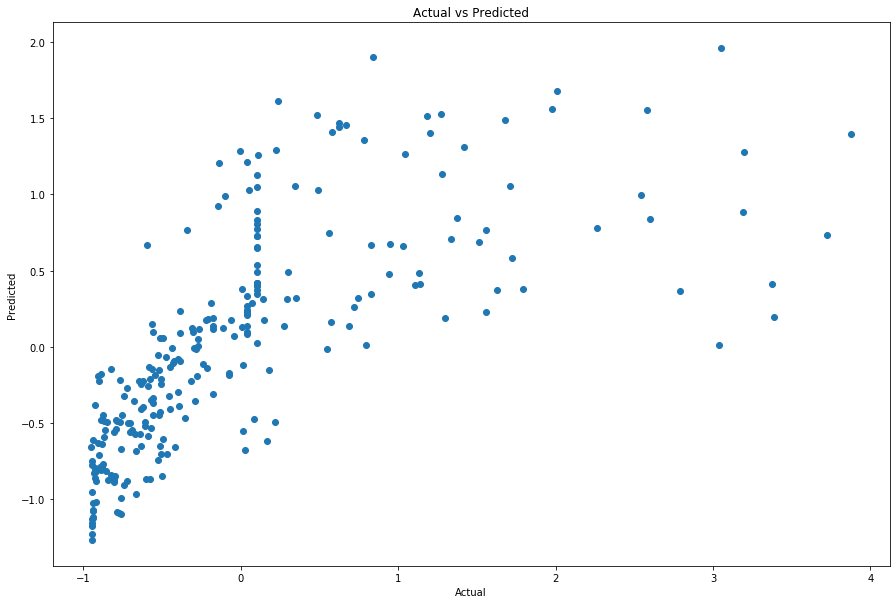

In [487]:
F_y_test,F_y_pred=check_neural_plot(F_X_train,F_y_train,F_X_test,F_y_test, 15, 10)

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.0


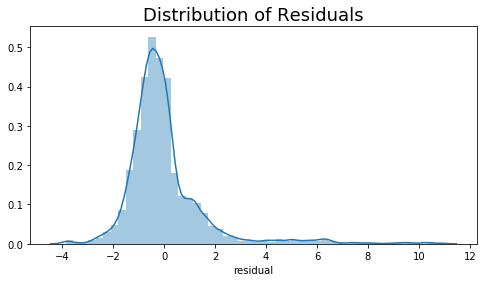

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.0


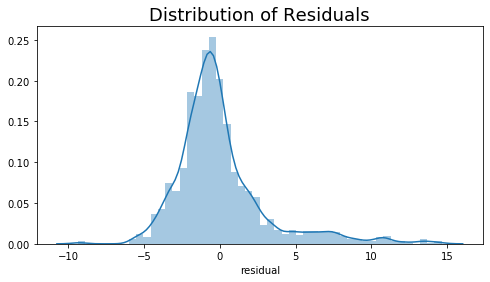

In [489]:
def check_residuals(table):
    from statsmodels.stats.diagnostic import normal_ad
    import statsmodels.api as sm
    
    X = table[['Year', 
           'Estimated annual AIDS related death number',
           'Estimated annual new HIV number',
           'Estimated number of people living with HIV',
           'Estimated annual AID related deaths rate per 100000', 'Country_code',
           'Region_code', 'Sex_code']]
    X = sm.add_constant(X) # adding a constant
    
    olsmod = sm.OLS(table['Estimated new HIV incidence rate per 1000'], X).fit()
    table['residual'] = olsmod.resid
    # Performing the test on the residuals
    p_value = normal_ad(table['residual'])[1]
    print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(8, 4))
    plt.title('Distribution of Residuals', fontsize=18)
    sns.distplot(table['residual'])
    plt.show()
    return
check_residuals(male_table)
check_residuals(female_table)

In [518]:
from sklearn.metrics import r2_score
print('R2 for female:',r2_score(F_y_test,F_y_pred))
print('R2 for male:', r2_score(M_y_test,M_y_pred))

R2 for female: 0.7433788781357116
R2 for male: 0.5467672434449818
